### [예제 10.1] 선형 커널을 사용한 하드 마진 SVM 분류 모델

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=40, centers=2, random_state=6)

In [2]:
clf = svm.SVC(kernel="linear", C=1000).fit(X, y)

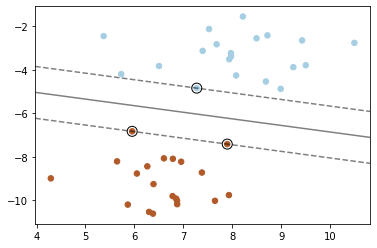

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim, ylim = ax.get_xlim(), ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX,
           YY,
           Z,
           colors="k",
           levels=[-1, 0, 1],
           alpha=0.5,
           linestyles=["--", "-", "--"])
ax.scatter(clf.support_vectors_[:, 0],
           clf.support_vectors_[:, 1],
           s=100,
           linewidth=1,
           facecolors="none",
           edgecolors="k")

## 10 되새김 문제

### [되새김 문제 10.1] SVC 클래스의 적용

#### 문제

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

X, y = load_breast_cancer(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

#### 풀이

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    clf = make_pipeline(StandardScaler(), 
                        SVC(kernel=kernel)).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = (y_test == y_pred).mean() * 100
    print(f'커널: {kernel}, 정확도:{acc: .2f}%')

커널: linear, 정확도: 95.21%
커널: poly, 정확도: 84.57%
커널: rbf, 정확도: 94.15%
